## Importing libraries

In [1]:
import pandas as pd   #to work with dataframes
import numpy as np    #for mathematical operations
from sklearn.model_selection import  train_test_split   #for splitting into train and test data
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier , VotingClassifier , GradientBoostingClassifier 
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score,classification_report,f1_score,precision_score,recall_score, roc_curve  #metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold

from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
RANDOM_STATE = 1

In [3]:
credit_card_dataset = pd.read_csv("../Data/BankChurners.csv")

credit_card_dataset.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
           'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
           'CLIENTNUM'],axis=1,
          inplace = True)

credit_card_dataset = credit_card_dataset.replace({'Existing Customer':0,'Attrited Customer':1})

In [4]:
credit_card_dataset.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Functions - 
Category data type conversion,   
Training-validation split,     
Stratified Cross validation,   
Model training and Metrics,   
Remove outliers,     
Standard Scaler  

#### [1]String/Object Data type to Category Data Type

In [5]:
def cate_type(df):
    ndf = df.copy(deep=True)
    c = ndf.select_dtypes(include = 'object').columns   # selecting string type columns
    for i in c:
        ndf[i] = ndf[i].astype('category').cat.codes   # categorical columns to panda category type
    return(ndf)  

In [6]:
cc_df = cate_type(credit_card_dataset)

In [7]:
cc_df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


#### [2]Training and validation data split

In [8]:
def ttsplit(df, label_col_name='Attrition_Flag',test_size=0.2):
    df2 = df.copy(deep=True)
    y = df2[label_col_name]
    df2 = df2.drop(label_col_name, axis=1, inplace=False)
    assert label_col_name not in df2.columns
    
    X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=test_size, shuffle=True, random_state=RANDOM_STATE, stratify=y)
    print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
    return(X_train, X_test ,y_train, y_test)

#### [3]Model training and metrics

In [9]:
def model_train_score(model, df):
    X_train, X_test, y_train, y_test = ttsplit(df)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    print(f'precision_score = {round(precision_score(y_test,pred),3)}')
    print(f'recall_score = {round(recall_score(y_test,pred),3)}')
    print(f'roc_score = {round(roc_auc_score(y_true=y_test , y_score=pred),3)}')
    print(f'f1_score = {round(f1_score(y_test,pred),3)}')
    
    # print(classification_report(y_test, pred))
    # print(confusion_matrix(y_test, pred))
    # cmd = ConfusionMatrixDisplay(confusion_matrix(y_test, pred))
    # cmd.plot()

#### [4]Stratified cross validation function

In [10]:
def cv_score_model(df, model, folds=5, label_col_name="Attrition_Flag"):
    
    y = df[label_col_name].values  #dataframe to numpy array
    x = df.drop(label_col_name, axis=1, inplace=False).values   #dataframe to numpy array
    
    skfold = StratifiedKFold(random_state=RANDOM_STATE, n_splits=folds, shuffle=True) #creating object of StratifiedKFold class 
    
    f1_score_c= []   #initialzing empty list to store f1 scores of cross validation folds
    roc_auc= []
    precision  = []
    recall = []

    for train_i, test_i in skfold.split(x, y):   # skfold.split returns the indices
        X_train = x[train_i]
        y_train = y[train_i]
        
        X_test = x[test_i]
        y_test = y[test_i]
        
        model.fit(X_train, y_train)
        
        pred = model.predict(X_test)
        
        f1 = f1_score(y_test,pred)
        f1_score_c.append(f1)
        
        roc = roc_auc_score(y_test,pred)
        roc_auc.append(roc)
        
        prec = precision_score(y_test,pred)
        precision.append(prec)
        
        rec = recall_score(y_test,pred)
        recall.append(rec)
    
    
    print (f"precison_mean = {np.round(np.mean(precision),3)}, recall_mean= {np.round(np.mean(recall),3)}, f1_score_mean={np.round(np.mean(f1_score_c),3)},roc_mean= {np.round(np.mean(roc_auc),3)}")
        

#### [5]Function to remove outliers

In [11]:
def remove_outliers_from_num_columns(df):
    df2 = df.copy(deep = True)
    num_cols = [c for c in df2.select_dtypes(include=['float64','int64']).columns if c!="Attrition_Flag"]
    
    for col in num_cols:
        Q1 = df2[col].quantile(0.25)
        Q3 = df2[col].quantile(0.75)
        IQR = Q3-Q1
        lower_lim = Q1-(1.5*IQR)
        upper_lim = Q3+(1.5*IQR)
        
        df2 = df2.loc[(df2[col]>lower_lim) & (df2[col]<upper_lim)]
    
    return df2

#### [6]Standard scaler Function

In [12]:
def stan_scal(df):
    # Dropping label column
    ndf = df.drop(['Attrition_Flag'], axis=1, inplace=False)
   
    # Split
    df_category = ndf.select_dtypes(include = ['int8'])
    numerical_df = ndf.select_dtypes(include = ['float64','int64'])
    
    # Sanity test
    assert len(df_category.columns) + len(numerical_df.columns) == len(ndf.columns)
    
    # Scale numerical columns - ndarray
    stan_sc = StandardScaler()
    stan_sc.fit(numerical_df)
    
    # create numerical dataframe from ndarray
    df_numer = pd.DataFrame(columns=stan_sc.feature_names_in_, data=stan_sc.transform(numerical_df))

    # create final dataframe by joining scaled numerical features, categorical features and label
    df_final = df_category.join(df_numer)
    df_final['Attrition_Flag'] = df['Attrition_Flag']
    
    #sanity tests
    assert len(df_final.columns) == len(df.columns)
    assert set(df_final.columns) == set(df.columns)
    
    return df_final

## [E1][Best base model variant based on Train test split] Base model and its variants - Train and Validate Evaluation

In [13]:
cc_df = cate_type(credit_card_dataset)

In [14]:
cc_df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [15]:
rf = RandomForestClassifier(random_state=RANDOM_STATE,n_estimators=100)
model_train_score(rf,cc_df)

(8101, 19) (2026, 19) (8101,) (2026,)
precision_score = 0.932
recall_score = 0.849
roc_score = 0.919
f1_score = 0.889


In [16]:
rf = RandomForestClassifier(random_state=RANDOM_STATE,n_estimators=200)
model_train_score(rf,cc_df)

(8101, 19) (2026, 19) (8101,) (2026,)
precision_score = 0.936
recall_score = 0.862
roc_score = 0.925
f1_score = 0.897


In [17]:
rf = RandomForestClassifier(random_state=RANDOM_STATE,n_estimators=300)
model_train_score(rf,cc_df)

(8101, 19) (2026, 19) (8101,) (2026,)
precision_score = 0.934
recall_score = 0.865
roc_score = 0.926
f1_score = 0.898


In [18]:
rf = RandomForestClassifier(random_state=RANDOM_STATE,n_estimators=400)
model_train_score(rf,cc_df)

(8101, 19) (2026, 19) (8101,) (2026,)
precision_score = 0.94
recall_score = 0.868
roc_score = 0.929
f1_score = 0.902


In [19]:
rf = RandomForestClassifier(random_state=RANDOM_STATE,n_estimators=500)
model_train_score(rf,cc_df)

(8101, 19) (2026, 19) (8101,) (2026,)
precision_score = 0.943
recall_score = 0.868
roc_score = 0.929
f1_score = 0.904


In [20]:
rf = RandomForestClassifier(random_state=RANDOM_STATE,n_estimators=600)
model_train_score(rf,cc_df)

(8101, 19) (2026, 19) (8101,) (2026,)
precision_score = 0.934
recall_score = 0.874
roc_score = 0.931
f1_score = 0.903


In [21]:
rf = RandomForestClassifier(random_state=RANDOM_STATE,n_estimators=700)
model_train_score(rf,cc_df)

(8101, 19) (2026, 19) (8101,) (2026,)
precision_score = 0.931
recall_score = 0.871
roc_score = 0.929
f1_score = 0.9


In [22]:
data = {'number_of_estimators':[100,200,300,400,500,600],'roc':[.919,.925,.926,0.929,0.929,.931], 'f1':[0.889,0.897,0.898,0.902,.904,0.903]}



In [23]:
print('Base model on Test Train Split')
table = pd.DataFrame(data)
print(table)

Base model on Test Train Split
   number_of_estimators    roc     f1
0                   100  0.919  0.889
1                   200  0.925  0.897
2                   300  0.926  0.898
3                   400  0.929  0.902
4                   500  0.929  0.904
5                   600  0.931  0.903


## [E2][Best base model variant based on CV] Base model and its variants - CV Evaluation

In [24]:
credit_card_dataset.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [25]:
cc_df = cate_type(credit_card_dataset)

In [26]:
rf = RandomForestClassifier(random_state=RANDOM_STATE,n_estimators=200, n_jobs=-1, class_weight="balanced_subsample")
cv_score_model(cc_df,rf)

precison_mean = 0.933, recall_mean= 0.795, f1_score_mean=0.858,roc_mean= 0.892


In [27]:
rf = RandomForestClassifier(random_state=RANDOM_STATE,n_estimators=300, n_jobs=-1, class_weight="balanced_subsample")
cv_score_model(cc_df,rf)

precison_mean = 0.932, recall_mean= 0.796, f1_score_mean=0.858,roc_mean= 0.892


In [28]:
rf = RandomForestClassifier(random_state=RANDOM_STATE,n_estimators=350, n_jobs=-1, class_weight="balanced_subsample")
cv_score_model(cc_df,rf)

precison_mean = 0.932, recall_mean= 0.797, f1_score_mean=0.859,roc_mean= 0.893


In [29]:
rf = RandomForestClassifier(random_state=RANDOM_STATE,n_estimators=400, n_jobs=-1, class_weight="balanced_subsample")
cv_score_model(cc_df,rf)

precison_mean = 0.932, recall_mean= 0.797, f1_score_mean=0.859,roc_mean= 0.893


In [30]:
rf = RandomForestClassifier(random_state=RANDOM_STATE,n_estimators=450, n_jobs=-1, class_weight="balanced_subsample")
cv_score_model(cc_df,rf)

precison_mean = 0.931, recall_mean= 0.798, f1_score_mean=0.859,roc_mean= 0.894


In [31]:
rf = RandomForestClassifier(random_state=RANDOM_STATE,n_estimators=500, n_jobs=-1, class_weight="balanced_subsample")
cv_score_model(cc_df,rf) # <<<<<<<<<<----------------- BASELINE

precison_mean = 0.931, recall_mean= 0.799, f1_score_mean=0.86,roc_mean= 0.894


In [32]:
rf = RandomForestClassifier(random_state=RANDOM_STATE,n_estimators=550, n_jobs=-1, class_weight="balanced_subsample")
cv_score_model(cc_df,rf)

precison_mean = 0.931, recall_mean= 0.798, f1_score_mean=0.859,roc_mean= 0.894


In [33]:
rf = RandomForestClassifier(random_state=RANDOM_STATE,n_estimators=600, n_jobs=-1, class_weight="balanced_subsample")
cv_score_model(cc_df,rf)

precison_mean = 0.932, recall_mean= 0.798, f1_score_mean=0.86,roc_mean= 0.893


In [34]:
baseline =  RandomForestClassifier(random_state=RANDOM_STATE,n_estimators=500, n_jobs=-1, class_weight="balanced_subsample")

In [35]:
# data = {'number_of_estimators':[200,300,350,400,450,500,550,600],'f1_mean_score':[0.858,0.858,.859,.859,.859,.86,.859,.86],'roc_mean_Score':[0.892,0.892,.893,.893,.894,.894,.894,.893]}
# df = pd.DataFrame(data)        
        

In [36]:
# print('Base model on Cross Validation split')
# print(df)


Base model on Cross Validation split
   number_of_estimators  f1_mean_score  roc_mean_Score
0                   200          0.858           0.892
1                   300          0.858           0.892
2                   350          0.859           0.893
3                   400          0.859           0.893
4                   450          0.859           0.894
5                   500          0.860           0.894
6                   550          0.859           0.894
7                   600          0.860           0.893


## [E3][Feat Transformaton and Selection] Best Base model  - CV Evaluation/selection of feature(s)

#### [E3.1] Removing outliers

In [37]:
cc_df = cate_type(credit_card_dataset)
cc_df = remove_outliers_from_num_columns(cc_df)

In [38]:
cc_df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [39]:
cv_score_model(cc_df,baseline)

precison_mean = 0.924, recall_mean= 0.801, f1_score_mean=0.858,roc_mean= 0.894


#### [E3.2] Standard Scaler

In [40]:
cc_df = cate_type(credit_card_dataset)
cc_df = stan_scal(cc_df)

cv_score_model(cc_df,baseline)

precison_mean = 0.928, recall_mean= 0.801, f1_score_mean=0.86,roc_mean= 0.894


#### [E3.3] Adding new feature

In [41]:
def new_feat(df):
    df['avg_trans']= df['Total_Trans_Amt']/df['Total_Trans_Ct']
    return df

In [42]:
cc_df = cate_type(credit_card_dataset) #original dataset with no manipulation
cc_df = new_feat(cc_df)

In [43]:
cv_score_model(cc_df, baseline)

precison_mean = 0.932, recall_mean= 0.814, f1_score_mean=0.869,roc_mean= 0.901


#### [E3.4] Keeping most important features - on best base model - CV evaulation 

In [44]:
def feat_imp(model, df):
    #drop label column
    df = df.drop(['Attrition_Flag'],axis=1)
    
    #storing feature importance in a dataframe
    
    f = pd.DataFrame({'Names':df.columns,'Importance':model.feature_importances_})
    
    #sorting as per feature importance value
    f = f.sort_values(by='Importance', ascending=False)
    return f

In [45]:
data = {'Changes':['Outliers Removed','Standard scaler applied','Feature addition'],'F1_mean_score':[.858,.86,.869],'Roc mean score':[.894,.894,.901]}

In [46]:
df = pd.DataFrame(data)

#### [E3.5] Combining options of feature engineering 

In [47]:
def complete_feat_eng(df):
    cc_df = cate_type(df)
    cc_df = new_feat(cc_df)
    cc_df = stan_scal(cc_df)
    assert set(df.columns).issubset(set(cc_df.columns)) 
    return cc_df

In [48]:
credit_card_dataset.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [49]:
cc_df = complete_feat_eng(credit_card_dataset)
cc_df.head()

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,avg_trans,Attrition_Flag
0,1,3,1,2,0,-0.165406,0.503368,0.384621,0.763943,-1.327136,...,0.446622,-0.473422,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882,-1.339801,0
1,0,2,2,4,0,0.333570,2.043199,1.010715,1.407306,-1.327136,...,-0.041367,-0.366667,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276,-0.889732,0
2,1,2,1,3,0,0.583058,0.503368,0.008965,0.120579,-1.327136,...,-0.573698,-1.426858,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155,1.202038,0
3,0,3,3,4,0,-0.789126,1.273283,-0.241473,-0.522785,1.641478,...,-0.585251,1.661686,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686,-0.153874,0
4,1,5,1,2,0,-0.789126,0.503368,-1.869317,0.763943,-1.327136,...,-0.430877,-1.426858,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155,-1.267659,0


In [50]:
cv_score_model(cc_df, baseline)

precison_mean = 0.936, recall_mean= 0.824, f1_score_mean=0.877,roc_mean= 0.907


In [51]:
fimp = feat_imp(baseline, cc_df)
fimp.tail()

,Names,Importance
1,Education_Level,0.007768
3,Income_Category,0.006911
2,Marital_Status,0.006190
0,Gender,0.005437
4,Card_Category,0.001536


In [52]:
fimp = feat_imp(baseline, cc_df)
keep_cols = fimp[fimp.Importance>0.005].Names
cc_df = cc_df[keep_cols]
cc_df['Attrition_Flag'] = credit_card_dataset['Attrition_Flag']

In [53]:
cv_score_model(cc_df, baseline)

precison_mean = 0.935, recall_mean= 0.823, f1_score_mean=0.875,roc_mean= 0.906


## [E4] [Best base model] Experiment on ADABoost, Random Forest, XGBoost - CV evaluation/selection for best model 

In [54]:
ada = AdaBoostClassifier(random_state=RANDOM_STATE, n_estimators=500, learning_rate=0.1)
xg = XGBClassifier(random_state = RANDOM_STATE, n_estimators=500, learning_rate=0.1)

In [55]:
cc_df = complete_feat_eng(credit_card_dataset)
for i in [ada, baseline, xg]:
    print()
    cv_score_model(cc_df, i)
    


precison_mean = 0.915, recall_mean= 0.807, f1_score_mean=0.858,roc_mean= 0.896

precison_mean = 0.936, recall_mean= 0.824, f1_score_mean=0.877,roc_mean= 0.907

precison_mean = 0.932, recall_mean= 0.892, f1_score_mean=0.911,roc_mean= 0.94


**XGBoost clearly otperforms the random forest and ada boost**

In [56]:
data = {'Classifier':['Adaboost','RandomForest','XGB'],'f1 score mean':[.858,.877,.911],'roc score mean':[.896,.907,.94]}

In [57]:
print(pd.DataFrame(data))

     Classifier  f1 score mean  roc score mean
0      Adaboost          0.858           0.896
1  RandomForest          0.877           0.907
2           XGB          0.911           0.940


## [E5] [Best hyperparm for chosen model in last step] Hyperparam variants - CV for eval/selection of hyperparams

#### [E5.1] XGBoost - Learning Rate Variant

In [58]:
xg = XGBClassifier(random_state = RANDOM_STATE,learning_rate=0.09,  n_estimators=500, n_jobs=-1)
cv_score_model(cc_df,xg)

##------Baseline

precison_mean = 0.933, recall_mean= 0.892, f1_score_mean=0.912,roc_mean= 0.94


In [59]:
xg = XGBClassifier(random_state = RANDOM_STATE,learning_rate=0.08,  n_estimators=500, n_jobs=-1)
cv_score_model(cc_df,xg)

precison_mean = 0.933, recall_mean= 0.89, f1_score_mean=0.911,roc_mean= 0.939


In [60]:
xg = XGBClassifier(random_state = RANDOM_STATE,learning_rate=0.07,  n_estimators=500, n_jobs=-1)
cv_score_model(cc_df,xg)

precison_mean = 0.934, recall_mean= 0.889, f1_score_mean=0.911,roc_mean= 0.939


In [61]:
xg = XGBClassifier(random_state = RANDOM_STATE,learning_rate=0.06,  n_estimators=500, n_jobs=-1)
cv_score_model(cc_df,xg)

precison_mean = 0.933, recall_mean= 0.888, f1_score_mean=0.91,roc_mean= 0.938


In [62]:
data = {'Learning rate':[.09,.08,.07,.06],'roc score mean':[.94,.939,.939,.938],'f1 score mean':[.912,.911,.911,.91]}

In [63]:
print(pd.DataFrame(data))

   Learning rate  roc score mean  f1 score mean
0           0.09           0.940          0.912
1           0.08           0.939          0.911
2           0.07           0.939          0.911
3           0.06           0.938          0.910


### Controlling overfitting by controlling complexity

#### [E5.2] XGBoost - max_depth Variant (default -6)
**More depth of a tree increases complexity,may lead to overfitting**


In [64]:
xg = XGBClassifier(random_state = RANDOM_STATE,learning_rate=0.09,  n_estimators=500, n_jobs=-1, max_depth=5)
cv_score_model(cc_df,xg)

precison_mean = 0.937, recall_mean= 0.891, f1_score_mean=0.913,roc_mean= 0.94


In [65]:
xg = XGBClassifier(random_state = RANDOM_STATE,learning_rate=0.09,  n_estimators=500, n_jobs=-1, max_depth=4)
cv_score_model(cc_df,xg)

precison_mean = 0.935, recall_mean= 0.891, f1_score_mean=0.912,roc_mean= 0.94


In [66]:
xg = XGBClassifier(random_state = RANDOM_STATE,learning_rate=0.09,  n_estimators=500, n_jobs=-1, max_depth=3)
cv_score_model(cc_df,xg)

#max_depth=3 , slightly improves the metrics

precison_mean = 0.933, recall_mean= 0.899, f1_score_mean=0.916,roc_mean= 0.943


In [67]:
xg = XGBClassifier(random_state = RANDOM_STATE,learning_rate=0.09,  n_estimators=500, n_jobs=-1, max_depth=2)
cv_score_model(cc_df,xg)

precison_mean = 0.939, recall_mean= 0.883, f1_score_mean=0.91,roc_mean= 0.936


In [68]:
data= {'max depth':[5,4,3,2],'roc score mean':[.94,.94,.943,.936],'f1 score mean':[.913,.912,.916,.91]}

In [69]:
print(pd.DataFrame(data))

   max depth  roc score mean  f1 score mean
0          5           0.940          0.913
1          4           0.940          0.912
2          3           0.943          0.916
3          2           0.936          0.910


#### [E5.3] XGBoost - min_child_weight -(default-1)
Minimum sum of instance weight (hessian) needed in a child. If the tree partition step results in a leaf node with the sum of instance weight less than min_child_weight, then the building process will give up further partitioning. In linear regression task, this simply corresponds to minimum number of instances needed to be in each node. The larger min_child_weight is, the more conservative the algorithm will be.

range: [0,∞]


In [70]:
xg = XGBClassifier(random_state = RANDOM_STATE,learning_rate=0.09,  n_estimators=500, n_jobs=-1, max_depth=3, min_child_weight=2)
cv_score_model(cc_df,xg)


precison_mean = 0.929, recall_mean= 0.898, f1_score_mean=0.913,roc_mean= 0.942


In [71]:
xg = XGBClassifier(random_state = RANDOM_STATE,learning_rate=0.09,  n_estimators=500, n_jobs=-1, max_depth=3, min_child_weight=3)
cv_score_model(cc_df,xg)


precison_mean = 0.929, recall_mean= 0.894, f1_score_mean=0.911,roc_mean= 0.941


In [72]:
xg = XGBClassifier(random_state = RANDOM_STATE,learning_rate=0.09,  n_estimators=500, n_jobs=-1, max_depth=3, min_child_weight=4)
cv_score_model(cc_df,xg)


precison_mean = 0.934, recall_mean= 0.896, f1_score_mean=0.915,roc_mean= 0.942


In [73]:
data = {'minimum child weight':[2,3,4], 'roc mean score':[.898,.894,.896],'f1 mean score':[.913,.911,.915]}

In [74]:
print(pd.DataFrame(data))

   minimum child weight  roc mean score  f1 mean score
0                     2           0.898          0.913
1                     3           0.894          0.911
2                     4           0.896          0.915


### Controlling overfitting by adding randomness,

#### [E5.4] XGBoost - subsample

**Subsampling adds randomness ,reducing overfitt , default value=1**


In [75]:
xg = XGBClassifier(random_state = RANDOM_STATE,learning_rate=0.09,  n_estimators=500, n_jobs=-1, max_depth=3,subsample=0.4)
cv_score_model(cc_df,xg)

precison_mean = 0.93, recall_mean= 0.89, f1_score_mean=0.909,roc_mean= 0.939


In [76]:
xg = XGBClassifier(random_state = RANDOM_STATE,learning_rate=0.09,  n_estimators=500, n_jobs=-1, max_depth=3,subsample=0.5)
cv_score_model(cc_df,xg)

precison_mean = 0.934, recall_mean= 0.891, f1_score_mean=0.912,roc_mean= 0.939


In [77]:
xg = XGBClassifier(random_state = RANDOM_STATE,learning_rate=0.09,  n_estimators=500, n_jobs=-1, max_depth=3,subsample=0.6)
cv_score_model(cc_df,xg)

precison_mean = 0.934, recall_mean= 0.893, f1_score_mean=0.913,roc_mean= 0.94


In [78]:
xg = XGBClassifier(random_state = RANDOM_STATE,learning_rate=0.09,  n_estimators=500, n_jobs=-1, max_depth=3,subsample=0.7)
cv_score_model(cc_df,xg)

precison_mean = 0.937, recall_mean= 0.896, f1_score_mean=0.916,roc_mean= 0.942


In [79]:
data = {'subsample':[0.4,0.5,0.6,0.7],'f1 score mean':[.909,.912,.913,.916],'roc score mean':[.939,.939,.94,.943]}

In [80]:
print(pd.DataFrame(data))

   subsample  f1 score mean  roc score mean
0        0.4          0.909           0.939
1        0.5          0.912           0.939
2        0.6          0.913           0.940
3        0.7          0.916           0.943


### Handling Imbalanced Dataset

#### [E5.4] XGBoost - scale_pos_weight (default-1)

In [81]:
ratio = float(np.sum(cc_df["Attrition_Flag"] == 0)) / np.sum(cc_df["Attrition_Flag"]==1)

In [82]:
xg = XGBClassifier(random_state = RANDOM_STATE,learning_rate=0.09,  n_estimators=500, n_jobs=-1, max_depth=3,scale_pos_weight=ratio)
cv_score_model(cc_df,xg)


precison_mean = 0.88, recall_mean= 0.944, f1_score_mean=0.911,roc_mean= 0.96


## [E6]Experiment- Holding out a test set -to evaluate overfit and underfit 

## Functions

### 1. Apply feature engineering- whole dataset

In [83]:
cc_df = complete_feat_eng(credit_card_dataset) # this will convert to categoty type data, add new feature and apply standard scalar 

In [84]:
cc_df.head()

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,avg_trans,Attrition_Flag
0,1,3,1,2,0,-0.165406,0.503368,0.384621,0.763943,-1.327136,...,0.446622,-0.473422,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882,-1.339801,0
1,0,2,2,4,0,0.333570,2.043199,1.010715,1.407306,-1.327136,...,-0.041367,-0.366667,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276,-0.889732,0
2,1,2,1,3,0,0.583058,0.503368,0.008965,0.120579,-1.327136,...,-0.573698,-1.426858,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155,1.202038,0
3,0,3,3,4,0,-0.789126,1.273283,-0.241473,-0.522785,1.641478,...,-0.585251,1.661686,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686,-0.153874,0
4,1,5,1,2,0,-0.789126,0.503368,-1.869317,0.763943,-1.327136,...,-0.430877,-1.426858,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155,-1.267659,0


In [85]:
cc_df.shape,credit_card_dataset.shape

((10127, 21), (10127, 20))

### 2. Split dataset into train and test

In [86]:
X_train, X_test_f, y_train, y_test_f = ttsplit(cc_df, test_size=0.1) # we are divinding dataset into  train -90% and test -10% of the dataset

(9114, 20) (1013, 20) (9114,) (1013,)


### 3. CV Evaluation on train set

In [87]:
xg = XGBClassifier(random_state = RANDOM_STATE,learning_rate=0.09,  n_estimators=500, n_jobs=-1, max_depth=3,scale_pos_weight=ratio)

train_final = X_train.join(y_train)   # features and label combined dataset, this is required for cv_score_model function
cv_score_model(train_final, xg)

precison_mean = 0.871, recall_mean= 0.936, f1_score_mean=0.902,roc_mean= 0.955


### 4. Train model on train set and predict on test set

In [91]:
def train_eval(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    predictions = xg.predict(X_test)
    print(f'precision_score= {round(precision_score(y_test,predictions),3)}')
    print(f'recall_score= {round(recall_score(y_test,predictions),3)}')
    print(f'f1_score= {round(f1_score(y_test,predictions),3)}')
    print(f'roc_auc_score= {round(roc_auc_score(y_true=y_test , y_score=predictions),3)}')
    print('Classification report')
    print(classification_report(y_test, predictions))
    
    
train_eval(xg,X_train, X_test_f, y_train, y_test_f)

precision_score= 0.907
recall_score= 0.957
f1_score= 0.931
roc_auc_score= 0.969
Classification report
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       850
           1       0.91      0.96      0.93       163

    accuracy                           0.98      1013
   macro avg       0.95      0.97      0.96      1013
weighted avg       0.98      0.98      0.98      1013



## Feature Importance

In [89]:
def fi(model):
    f = pd.DataFrame({'Features':model.feature_names_in_,'Importance':model.feature_importances_})
    f.sort_values(by='Importance',ascending=False,inplace=True)
    print(f)
    sns.barplot(data=f,x=f['Features'],y=f['Importance'])
    plt.xticks(rotation='vertical')

                    Features  Importance
16            Total_Trans_Ct    0.302886
12       Total_Revolving_Bal    0.145232
19                 avg_trans    0.114320
8   Total_Relationship_Count    0.091971
15           Total_Trans_Amt    0.056318
17       Total_Ct_Chng_Q4_Q1    0.048441
9     Months_Inactive_12_mon    0.038148
14      Total_Amt_Chng_Q4_Q1    0.033639
10     Contacts_Count_12_mon    0.029336
5               Customer_Age    0.020395
0                     Gender    0.019826
7             Months_on_book    0.019441
2             Marital_Status    0.015973
13           Avg_Open_To_Buy    0.015365
18     Avg_Utilization_Ratio    0.012770
11              Credit_Limit    0.011413
6            Dependent_count    0.009531
1            Education_Level    0.009019
3            Income_Category    0.005962
4              Card_Category    0.000015


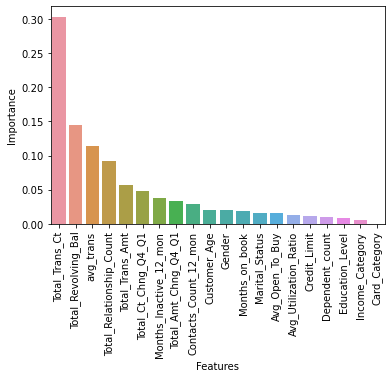

In [90]:
fi(xg)